In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

(x_train,y_train),(x_test,y_test)=mnist.load_data()

Model 1 - Handwrittten Characters Recognition using TensorFlow Keras
1-Load data
2-Import data
3-Preprocess and analyse data
4-Split data
5-Create Model layers
6-Train the model
7-Validate model
8-Create Tkinter GUI for single predictions(Optional)

In [24]:
import matplotlib.pyplot as plt

In [14]:
device='GPU'


In [15]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,num_classes=10)
y_test=keras.utils.to_categorical(y_test,num_classes=10)
x_train=x_train.astype('float64')
x_test=x_test.astype('float64')

x_train/=255
x_test/=255


In [16]:

batch_size=128
num_classes=10
epochs=10
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
model.save('mnist1')

Epoch 1/10
469/469 [==============================] - 168s 357ms/step - loss: 0.6167 - accuracy: 0.8033 - val_loss: 0.4257 - val_accuracy: 0.8811
Epoch 2/10
469/469 [==============================] - 165s 351ms/step - loss: 0.5872 - accuracy: 0.8146 - val_loss: 0.4039 - val_accuracy: 0.8879
Epoch 3/10
469/469 [==============================] - 164s 350ms/step - loss: 0.5613 - accuracy: 0.8242 - val_loss: 0.3845 - val_accuracy: 0.8916
Epoch 4/10
469/469 [==============================] - 164s 350ms/step - loss: 0.5347 - accuracy: 0.8328 - val_loss: 0.3684 - val_accuracy: 0.8961
Epoch 5/10
469/469 [==============================] - 170s 363ms/step - loss: 0.5199 - accuracy: 0.8363 - val_loss: 0.3560 - val_accuracy: 0.8976
Epoch 6/10
469/469 [==============================] - 163s 347ms/step - loss: 0.5038 - accuracy: 0.8427 - val_loss: 0.3443 - val_accuracy: 0.9007
Epoch 7/10
469/469 [==============================] - 156s 333ms/step - loss: 0.4898 - accuracy: 0.8486 - val_loss: 0.3333 -

INFO:tensorflow:Assets written to: mnist1/assets


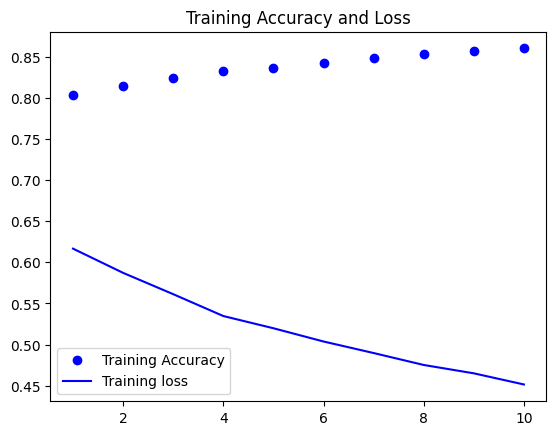

In [34]:
acc=hist.history['accuracy']
los=hist.history['loss']
val_acc=hist.history['val_accuracy']
val_los=hist.history['val_loss']

ep=range(1,len(acc)+1)

plt.plot(ep,acc,'bo',label="Training Accuracy")
plt.plot(ep,los,'b',label="Training loss")
plt.title("Training Accuracy and Loss")
plt.legend()
plt.show()